In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/MyDrive/HWAI

/content/drive/MyDrive/HWAI


In [27]:
cd /content/drive/MyDrive/HWAI/CIS419/Assignment1

/content/drive/MyDrive/HWAI/CIS419/Assignment1


In [28]:
from sklearn import tree

X = [[0,0], [2,2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

Visualizing the Data

In [123]:
import numpy as np
from numpy.linalg import *

# Matplotlib provides matlab like plotting tools in python
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#------------------------------------------------------------------------------------------------
# Plotting tools already written for you.
# Feel free edit and experiment.

def plotData1D( X, y, to_block = True):
    '''
        This function is to plot y vs X where the number of predictors of X is 1.
        Input
        X - n*1 matrix or vector of length n
        y - n*1 matrix or vector of length n
        to_block - boolean flag which when set stops the program execution until the 
            plot is closed
    '''
    plt.figure(1)
    plt.clf()
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X,y, 'rx', label='Training Data')
    # plt.show(block = to_block)

def plotRegLine1D( lr_model, X, y):
    '''
        Plots the y vs X and also the regressed line according to the theta computed.
        Input
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
        lr_model - linear regression trained model
    '''
    plotData1D(X[:,1], y, to_block =False)
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.autoscale(False)
    plt.plot(X[:,1],X*lr_model.theta,'b-', label='Regression Line')
    plt.legend(loc='lower right')
    plt.autoscale(True)
    plt.show()


def visualizeObjective(lr_model,t1_vals,t2_vals, X, y):
    '''
        The function does the surface plot of the objective for a 
        univariate regression problem with a bias term, so over 2 parameters.
        Search over the space of theta1, theta2.
        
        It also plots the gradient descent steps as blue points on the surface plot.
        Finally it plots a contour plot of the same
        
        lr_model - object of class LinReg (already trained)
        t1_vals, t2_vals - values over which the objective function should be plotted
                        List of numbers
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
    '''
    T1,T2 = np.meshgrid(t1_vals, t2_vals)
    n,p = T1.shape

    # Compute the objective function over the space
    Z = np.zeros(T1.shape)
    for i in range(n):
        for j in range(p):
            Z[i,j] = lr_model.computeCost(X,y, np.matrix([T1[i,j],T2[i,j]]).T )

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.autoscale(False)

    # If the history of the objective function plot the path taken by the gradient descent
    if lr_model.JHist !=None:
        
        for ii in range(len(lr_model.JHist)-1): 
            t1 = lr_model.JHist[ii][1].tolist()
            t2 = lr_model.JHist[ii+1][1].tolist()

            J1 = lr_model.JHist[ii][0]
            J2 = lr_model.JHist[ii+1][0]
            
            x_pts = [t1[0][0], t2[0][0]]
            y_pts = [t1[1][0], t2[1][0]]
            J_pts = [J1, J2]
            plt.plot(x_pts, y_pts, J_pts, 'b-')

        for J, t in lr_model.JHist: 
            plt.plot(t[0][0], t[1][0], J, 'mo')

    plt.title('Surface plot of the cost function')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    #plt.show()

    # Contour plot
    plt.figure()
    plt.clf()
    CS = plt.contour(T1, T2, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contours of cost function')
    plt.xlabel("Theta0")
    plt.ylabel("Theta1")

    plt.autoscale(True)
    plt.plot(lr_model.theta[0][0],lr_model.theta[1][0], 'rx')
    #plt.show()


LinearRegression  Function

In [124]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None
    

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []    
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            #print "Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta
            # TODO:  add update equation here
            n,d = X.shape
            thetaDimensions,b = theta.shape     
            corrections = [0] * thetaDimensions

            for j in range(0,n):
                for thetaDimension in range(0,thetaDimensions):
                    corrections[thetaDimension] += (theta.getT()*X[j,:].getT() - y[j])*X[j,thetaDimension]
            for thetaDimension in range(0,thetaDimensions):
                theta[thetaDimension] = theta[thetaDimension] - corrections[thetaDimension]*(self.alpha/n)               
        return theta

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** make certain you don't return a matrix with just one value! **
        '''
        # TODO: add objective (cost) equation here
        n, d = X.shape
        cost = (X*theta - y).getT()*(X*theta - y)/(2*n)
        return cost[0,0]
    

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta==None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)    


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        # TODO:  add prediction function here

In [125]:
import numpy as np
filePath = '/content/drive/MyDrive/HWAI/CIS419/Assignment1/hw1_skeleton/data/univariateData.dat'
file = open(filePath, 'r')
allData = np.loadtxt(file, delimiter=',')
X = np.matrix(allData[:,:-1])
y = np.matrix((allData[:, -1])).T
# get the number of instance (n) and number of feature(d)
n, d = X.shape

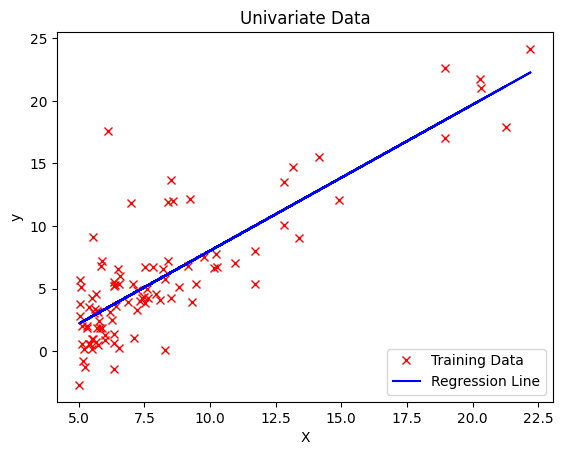

In [126]:
X = np.c_[np.ones((n,1)), X]
lr_model = LinearRegression(alpha = 0.01, n_iter = 1500)
lr_model.fit(X, y)
plotRegLine1D(lr_model, X, y)